## Inferrential Statistics

-Find correlation betwen time of day and base
-Find correlation betwen base and longitude and latitude.
-Find correlation betwen time of day and longitude and latitude.

In [1]:
from datetime import datetime
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import chisquare
plt.style.use('ggplot')  # sets up pretty plots
%matplotlib inline
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)

In [2]:
from scipy.stats import ttest_ind

In [3]:
df = pd.read_pickle('uber_clean_data.pkl')
df_small = df[0:100000] 

In [4]:
df_small.head()

,Lat,Lon,Base,datetime
0,40.7690,-73.9549,B02512,2014-04-01 00:11:00
1,40.7267,-74.0345,B02512,2014-04-01 00:17:00
2,40.7316,-73.9873,B02512,2014-04-01 00:21:00
3,40.7588,-73.9776,B02512,2014-04-01 00:28:00
4,40.7594,-73.9722,B02512,2014-04-01 00:33:00


In [5]:
df_small['hour'] = df_small['datetime'].dt.hour
df_small = df_small.sort_values('hour')

C:\Users\huzmu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
ttest_ind(df_small[df_small['Base']=='B02512']['hour'].values, df_small[df_small['Base']=='B02598']['hour'].values)

Ttest_indResult(statistic=3.546475720807242, pvalue=0.00039059911926816765)

since the p-value is less than 0.05 we reject the null hypothesis that base and hour of day have identical averages.

In [7]:
df_yellow = pd.read_pickle('yellowcab_clean_data.pkl')

In [8]:
df_yellow_small = df_yellow[0:100000]

In [9]:
df_yellow.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,total_time,trip_time,pickup_day,pickup_hour,pickup_minute
0,CMT,2014-04-08 08:59:39,2014-04-08 09:28:57,1,2.5,-73.958848,40.763585,1,-73.986284,40.752034,CRD,18.0,0.0,0.5,3.7,0.0,22.2,00:29:18,29,1,8,59
1,CMT,2014-04-08 14:59:22,2014-04-08 15:04:52,1,0.9,0.000000,0.000000,1,0.000000,0.000000,CRD,6.0,0.0,0.5,1.3,0.0,7.8,00:05:30,6,1,14,59
2,CMT,2014-04-08 08:45:28,2014-04-08 08:50:41,2,0.6,-73.992233,40.729136,1,-73.991387,40.735186,CRD,5.5,0.0,0.5,1.2,0.0,7.2,00:05:13,5,1,8,45
3,CMT,2014-04-08 08:00:20,2014-04-08 08:11:31,2,0.5,-73.973726,40.750095,1,-73.976889,40.755623,CRD,8.0,0.0,0.5,1.7,0.0,10.2,00:11:11,11,1,8,0
4,CMT,2014-04-08 08:38:36,2014-04-08 08:44:37,1,0.4,-73.973502,40.755479,1,-73.979198,40.758619,CRD,5.5,0.0,0.5,1.2,0.0,7.2,00:06:01,6,1,8,38


In [10]:
# trip distance and passenger count
# payment type and trip distance 
# trip distance and time of trip
# trip distance and price

In [11]:
from scipy.stats import pearsonr

In [12]:
pearsonr(df_yellow['trip_distance'], df_yellow['passenger_count'])

(0.018806229105656727, 0.0)

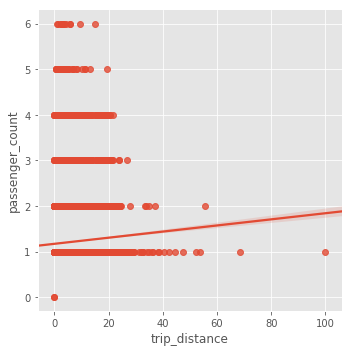

In [13]:
sns.lmplot('trip_distance', 'passenger_count', df_yellow_small)

In [14]:
pearsonr(df_yellow['trip_distance'], df_yellow['total_amount'])

(0.906404286367728, 0.0)

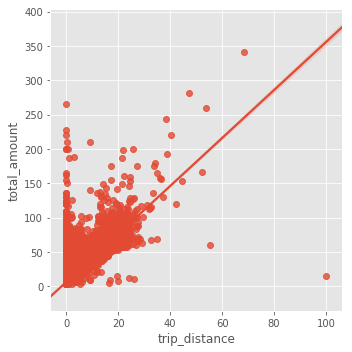

In [15]:
sns.lmplot('trip_distance', 'total_amount', df_yellow_small)

In [16]:
df_yellow['payment_type'].value_counts()

CRD    8375625
CSH    6120345
UNK      74199
NOC      37324
DIS      11266
Name: payment_type, dtype: int64

In [17]:
ttest_ind(df_yellow[df_yellow['payment_type']=='CRD']['trip_distance'].values, df_yellow[df_yellow['payment_type']=='CSH']['trip_distance'].values)

Ttest_indResult(statistic=275.13339470797837, pvalue=0.0)